## Linear Regression

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

### Import data

In [223]:
data = np.loadtxt(os.path.join(os.getcwd(),'data/ex1data1.txt'), delimiter=',')

In [224]:
x, y = data[:, 0], data[:, 1]  

### Linear Regression with one variable

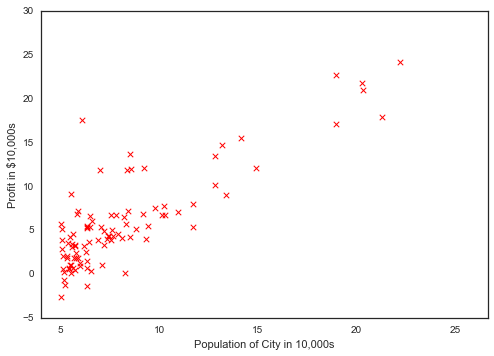

In [225]:
plt.scatter(x, y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(min(x) - abs(min(x))*0.2, max(x) + max(x)*0.2)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

In [226]:
def cost_func(x, y, theta):    
    m = x.size
    h = x.dot(theta)
    cost = 1/(2*m)*np.sum(np.square(h-y))    
    return cost

""" map variant is more pythonic, but above uses np power
def cost_func(x, y, theta):    
    cost = sum(map(lambda x, y: (x*theta - y)**2, x, y))
    return cost / (2*len(x))
"""

' map variant is more pythonic, but above uses np power\ndef cost_func(x, y, theta):    \n    cost = sum(map(lambda x, y: (x*theta - y)**2, x, y))\n    return cost / (2*len(x))\n'

In [227]:
def bust_optimization(x, y):
    costs = []
    theta1_optimized = 0
    min_cost = cost_func(x, y, theta1_optimized)
    thetas1 = np.arange(-10, 10, 0.05)
    
    for theta1 in thetas1:
        cost = cost_func(x, y, theta1)
        costs.append(cost)       
        if cost < min_cost:
            min_cost = cost
            theta1_optimized = theta1
            
    return theta1_optimized, min_cost, thetas1, costs

In [228]:
theta1_optimized, min_cost, thetas1, costs = bust_optimization(x, y)

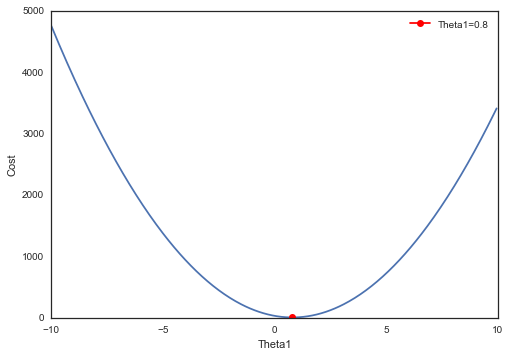

In [229]:
plt.plot(thetas1, costs)
plt.plot(theta1_optimized, min_cost, marker='o', color='r', label='Theta1=' + str(theta1_optimized))
plt.xlabel('Theta1')
plt.ylabel('Cost')
plt.legend(loc=1);

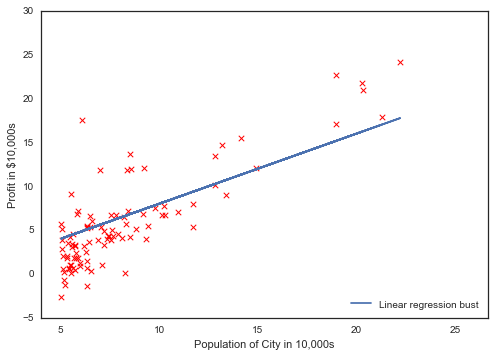

In [230]:
plt.plot(x, x.dot(theta1_optimized), label='Linear regression bust')
plt.scatter(x, y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(min(x) - abs(min(x))*0.2, max(x) + max(x)*0.2)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

---

### Linear Regression - Gradient Descent

In [231]:
x = np.c_[np.ones(data[:, 0].shape[0]), data[:, 0]]
y = data[:, 1] # original variant contains y = np.c_[data[:, 1]], but it's mistake

In [232]:
def gradient_descent(x, y, theta, alpha=0.01, num_iters=1500):
    m = y.size
    costs = np.zeros(num_iters)
    
    for i in np.arange(num_iters):
        h = x.dot(theta)
        theta = theta - alpha*(1/m)*(x.T.dot(h-y))
        costs[i] = cost_func(x, y, theta)
    return(theta, costs)

theta:  [-3.63029144  1.16636235]


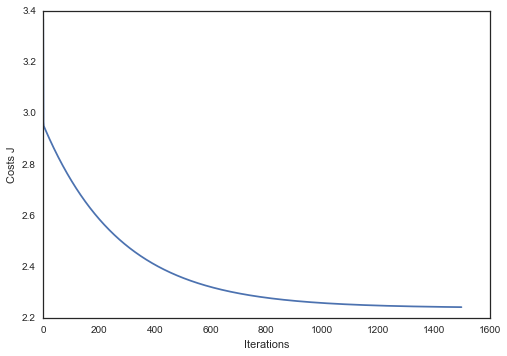

In [233]:
theta, costs = gradient_descent(x, y, theta=np.zeros(x.shape[1]))
print('theta: ', theta.ravel())

plt.plot(costs)
plt.ylabel('Costs J')
plt.xlabel('Iterations');

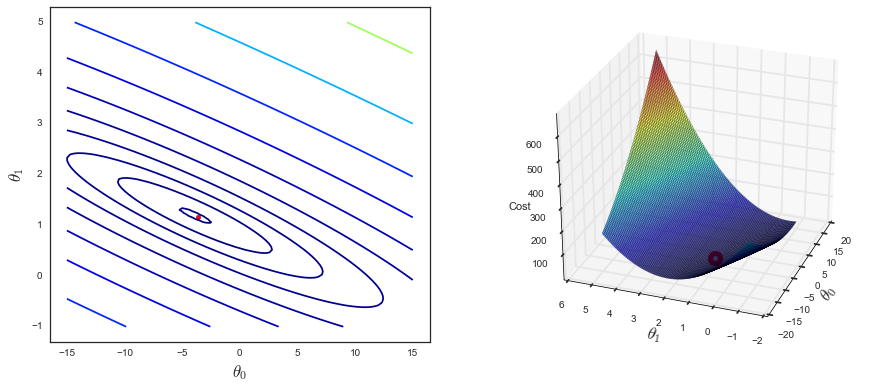

In [138]:
from mpl_toolkits.mplot3d import axes3d

# Create grid coordinates for plotting
B0 = np.linspace(-15, 15, 100)
B1 = np.linspace(-1, 5, 100)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = cost_func(x, y, theta=[xx[i,j], yy[i,j]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=30, azim=200)
ax2.scatter(theta[0], theta[1], cost_func(x, y, theta), s=100, facecolors='none', edgecolors='r', linewidth=5)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

---

### Linear Regression with multiple variables

In [234]:
# Import Data
# GD - without feature scaling
# GD - with feature scalling
    # Scaling 1
    # Scaling 2
# Graphs

In [235]:
# http://scikit-learn.org/stable/datasets/#boston-house-prices-dataset
# https://archive.ics.uci.edu/ml/datasets/Housing
from sklearn import datasets
boston = datasets.load_boston()

In [236]:
x = boston.data
y = boston.target

In [237]:
x_legend = ['CRIM: per capita crime rate by town',
'ZN: proportion of residential land zoned for lots over 25,000 sq.ft.', 
'INDUS: proportion of non-retail business acres per town', 
'CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)', 
'NOX: nitric oxides concentration (parts per 10 million)',
'RM: average number of rooms per dwelling',
'AGE: proportion of owner-occupied units built prior to 1940', 
'DIS: weighted distances to five Boston employment centres', 
'RAD: index of accessibility to radial highways', 
' TAX: full-value property-tax rate per $10,000', 
' PTRATIO: pupil-teacher ratio by town', 
' B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town', 
' LSTAT: % lower status of the population']
y_legend = 'MEDV: Median value of owner-occupied homes in $1000s'

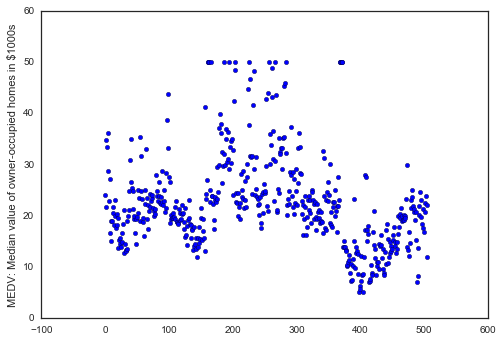

In [238]:
plt.scatter(np.arange(len(y)), y)
plt.ylabel(y_legend);

#### Overview how y depends on x's

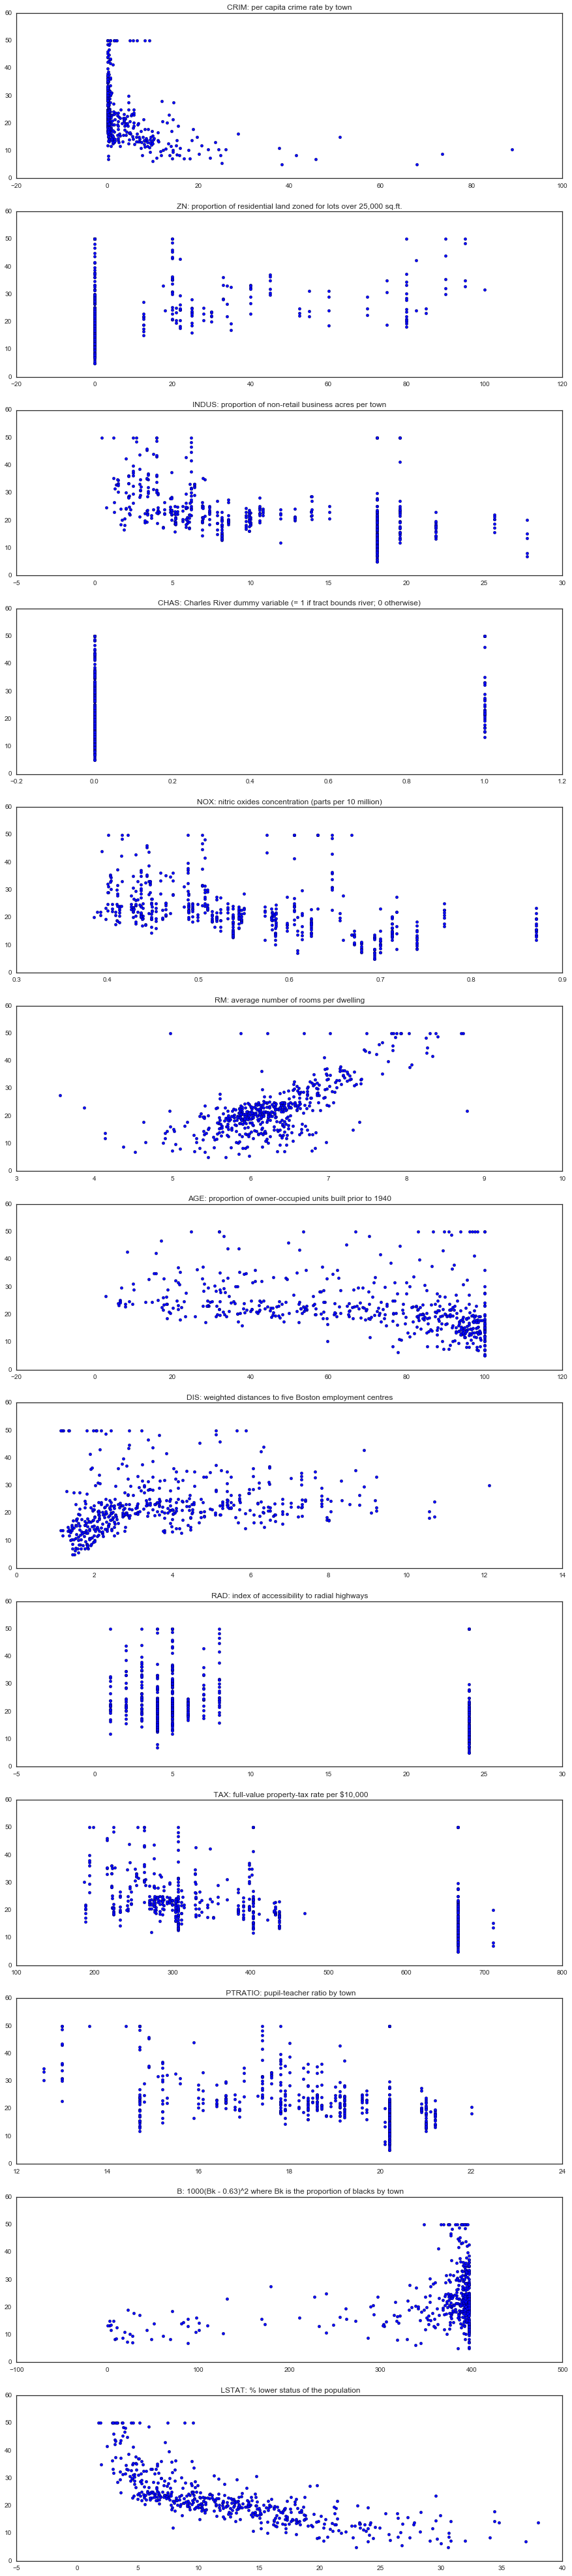

In [144]:
fig, axs = plt.subplots(x.shape[1], 1, figsize=(15, 70))
for i in range(x.shape[1]):
    axs[i].scatter(x[:, i], y)
    axs[i].set_title(x_legend[i]);

#### Try ordinary GD

theta:  [ 0.98759974  0.97056062  0.96728449  0.99981264  0.99844801  0.98296247
  0.80332108  0.99013166  0.97064661 -0.18525106  0.94913381  0.02624793
  0.96308093]


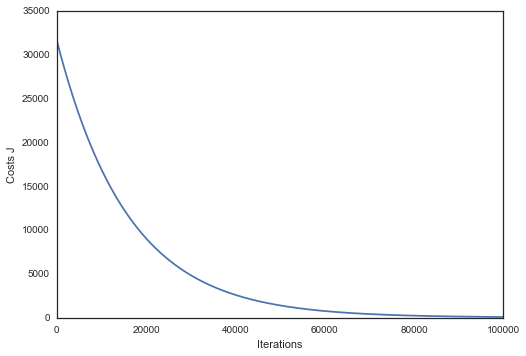

In [262]:
# in this case alpha is much smaller, otherwise GD will diverge
theta, costs = gradient_descent(x, y, alpha=0.0000000001, num_iters=10**5, theta=np.ones(x.shape[1]))
print('theta: ', theta)

plt.plot(costs)
plt.ylabel('Costs J')
plt.xlabel('Iterations');

#### Try to apply feature scaling